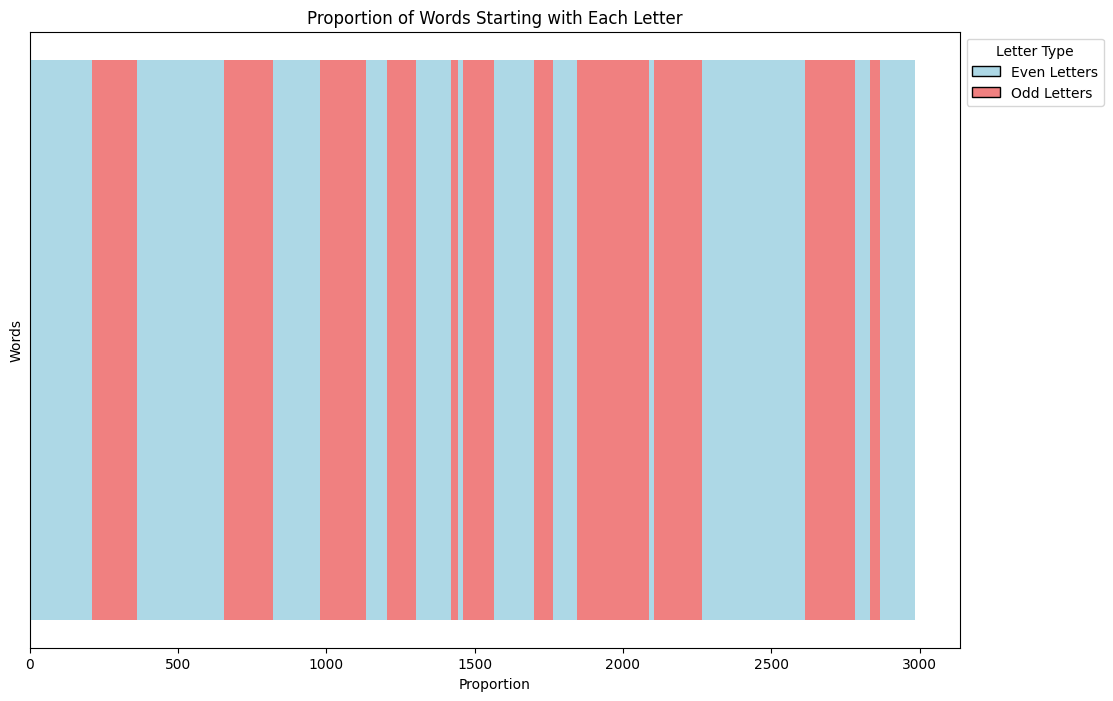

In [3]:
import matplotlib.pyplot as plt
import string


file_path = 'Oxford 3000.txt'
with open(file_path, 'r') as file:
    words = file.read().split()


letter_counts = {letter: sum(1 for word in words if word.startswith(letter)) for letter in string.ascii_lowercase}


total_words = sum(letter_counts.values())


proportions = {letter: count / total_words for letter, count in letter_counts.items()}


plt.figure(figsize=(12, 8))

bars = plt.barh([1], [total_words], color='white')  

even_colors = ['lightblue' for _ in range(13)]  
odd_colors = ['lightcoral' for _ in range(13)]  

for i, letter in enumerate(string.ascii_lowercase):
    color = even_colors[i % 13] if i % 2 == 0 else odd_colors[i % 13]
    plt.barh([1], [proportions[letter] * total_words], left=sum(proportions[letter2] * total_words for letter2 in string.ascii_lowercase[:i]),
             color=color, label=letter.upper())


plt.legend(handles=[plt.Rectangle((0,0),1,1, color='lightblue', ec="k"), plt.Rectangle((0,0),1,1,color='lightcoral', ec="k")], 
           labels=['Even Letters', 'Odd Letters'], title='Letter Type', bbox_to_anchor=(1, 1), loc='upper left')

plt.ylabel('Words')
plt.xlabel('Proportion')
plt.title('Proportion of Words Starting with Each Letter')
plt.yticks([])
plt.show()


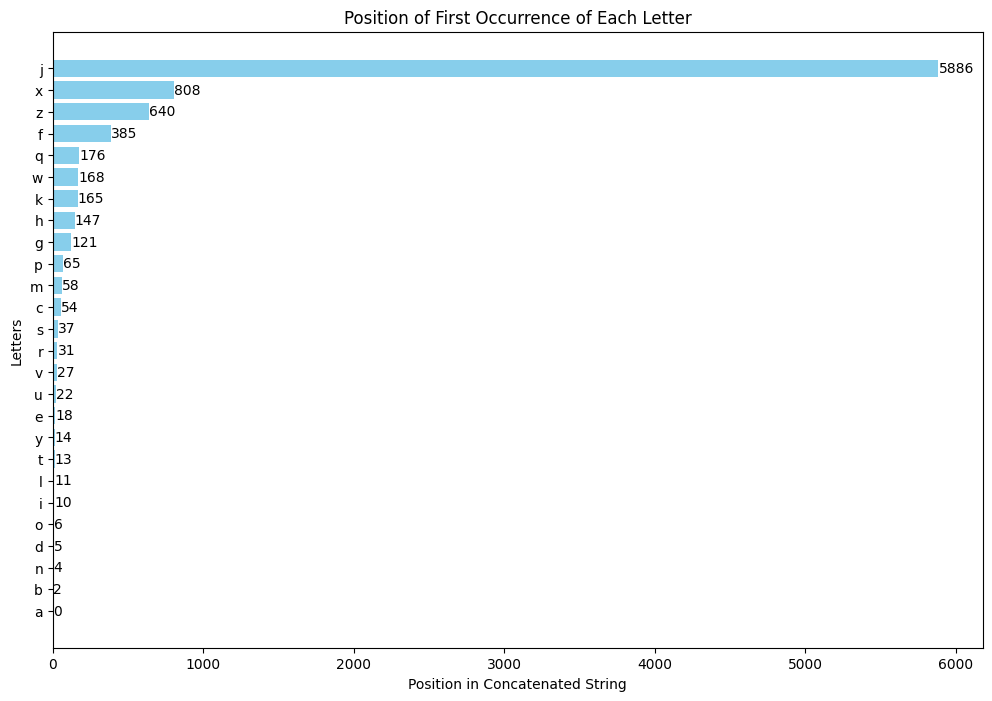

In [6]:
import matplotlib.pyplot as plt
import string


file_path = 'Oxford 3000.txt'  
with open(file_path, 'r') as file:
    words = file.read().split()


all_letters = ''.join(words)


first_positions = {}
found_letters = set()
for i, letter in enumerate(all_letters):
    if letter not in found_letters:
        found_letters.add(letter)
        first_positions[letter] = i
        if len(found_letters) == 26:
            break


plt.figure(figsize=(12, 8))
bars = plt.barh(list(first_positions.keys()), list(first_positions.values()), color='skyblue')


for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', va='center')

plt.xlabel('Position in Concatenated String')
plt.ylabel('Letters')
plt.title('Position of First Occurrence of Each Letter')
plt.show()
